# Simple Moving Average

In [2]:
import pandas as pd

df = pd.read_json("../../data/example00593.json", orient='series')
df = df.set_index('date')
s_data = df.tail(360)

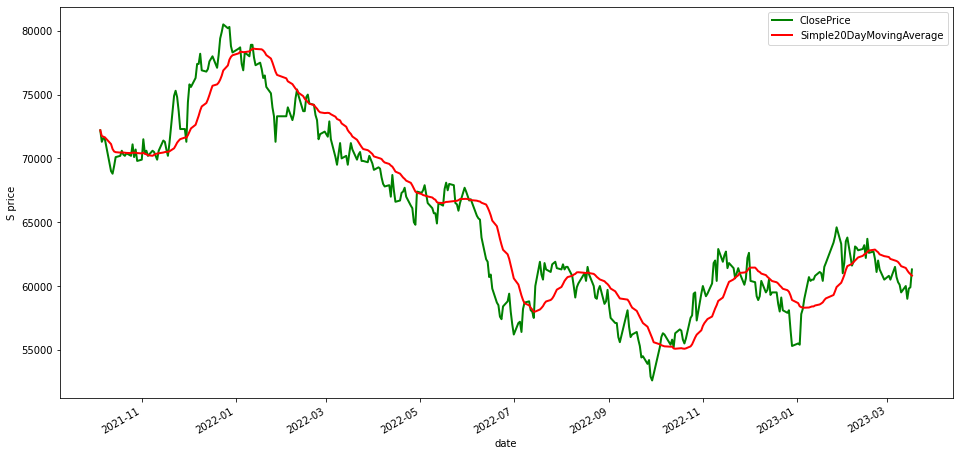

In [26]:
import statistics as stats

time_period = 20
history = []
sma_values = []

close = s_data['close']
for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
    sma_values.append(stats.mean(history))

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=s_data.index))
close_price = s_data['ClosePrice']
sma = s_data['Simple20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, ylabel='S price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()
    

# Exponential Moving Average

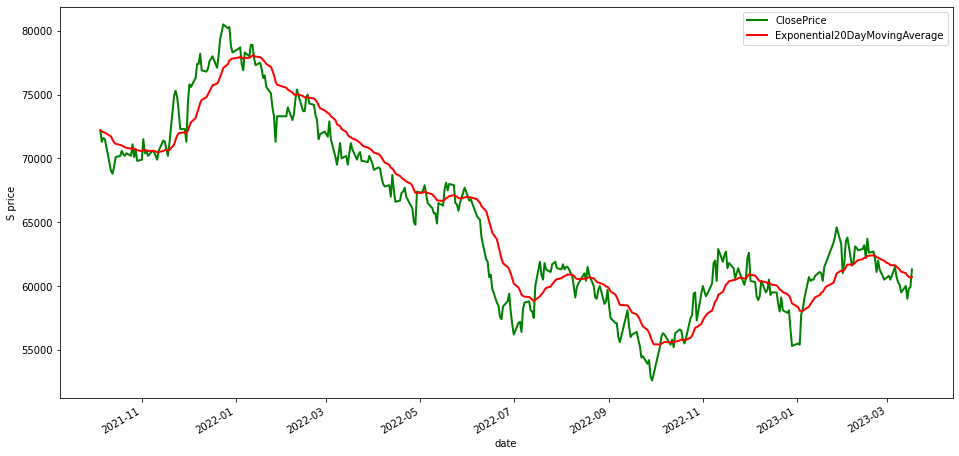

In [27]:
num_periods = 20
K = 2 / (num_periods + 1)
ema_p = 0
ema_values = []

close = s_data['close']
for close_price in close:
    if (ema_p == 0):
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=s_data.index))
close_price = s_data['ClosePrice']
ema = s_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, ylabel='S price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

# Absolute Price Oscillator

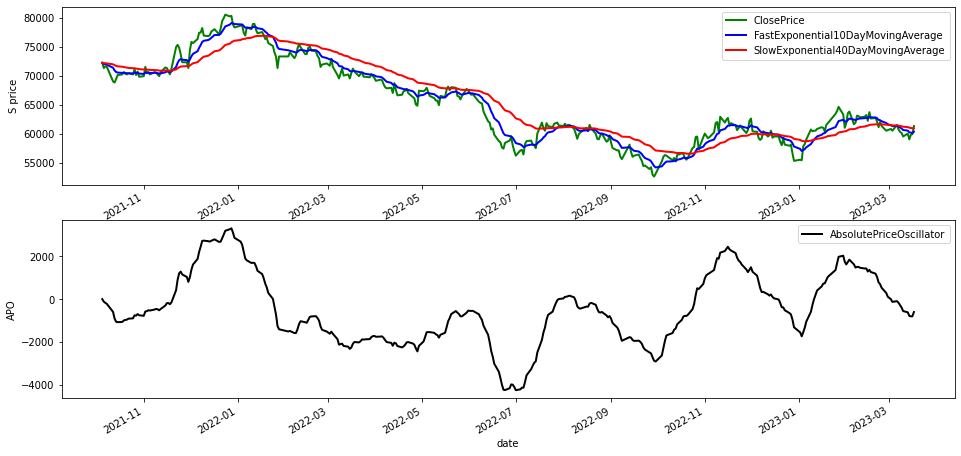

In [28]:
num_periods_fast = 10
k_fast = 2 /(num_periods_fast + 1)
ema_fast = 0

num_periods_slow = 40
k_slow = 2 /(num_periods_slow + 1)
ema_slow = 0

ema_fast_values = []
ema_slow_values = []
apo_values = []

close = s_data['close']
for close_price in close:
    if (ema_fast == 0):
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * k_fast + ema_fast
        ema_slow = (close_price - ema_slow) * k_slow + ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=s_data.index))
s_data = s_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=s_data.index))
s_data = s_data.assign(AbsolutePriceOscillator=pd.Series(apo_values, index=s_data.index))
close_price = s_data['ClosePrice']
ema_f = s_data['FastExponential10DayMovingAverage']
ema_s = s_data['SlowExponential40DayMovingAverage']
apo = s_data['AbsolutePriceOscillator']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(211, ylabel='S price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)

ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()

# MACD

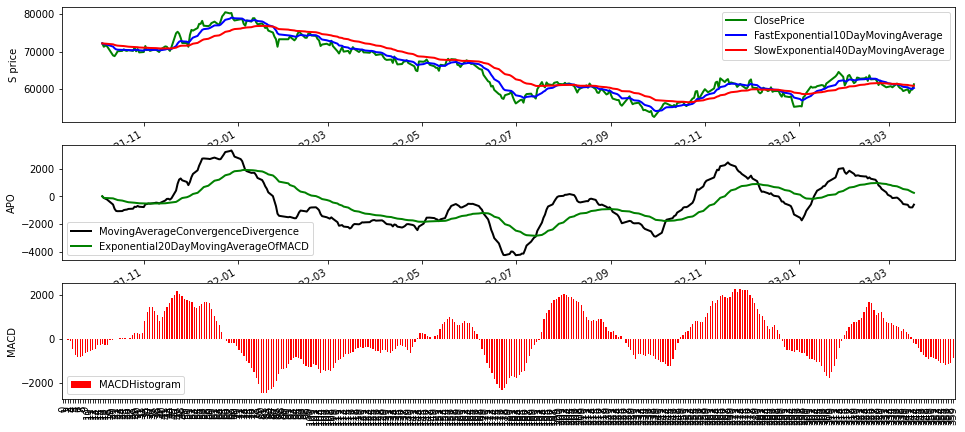

In [3]:
num_periods_fast = 10
k_fast = 2 /(num_periods_fast + 1)
ema_fast = 0

num_periods_slow = 40
k_slow = 2 /(num_periods_slow + 1)
ema_slow = 0

num_periods_macd = 20
k_macd = 2 /(num_periods_macd + 1)
ema_macd = 0

ema_fast_values = []
ema_slow_values = []
macd_values = []
macd_signal_values = []

macd_histogram_values = []

close = s_data['close']
for close_price in close:
    if (ema_fast == 0):
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * k_fast + ema_fast
        ema_slow = (close_price - ema_slow) * k_slow + ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    macd = ema_fast - ema_slow
    
    if ema_macd == 0:
        ema_macd = macd
    else:
        ema_macd = (macd - ema_macd) * k_slow + ema_macd
    
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    macd_histogram_values.append(macd - ema_macd)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=s_data.index))
s_data = s_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=s_data.index))
s_data = s_data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=s_data.index))
s_data = s_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=s_data.index))
s_data = s_data.assign(MACDHistogram=pd.Series(macd_histogram_values, index=s_data.index))

close_price = s_data['ClosePrice']
ema_f = s_data['FastExponential10DayMovingAverage']
ema_s = s_data['SlowExponential40DayMovingAverage']
macd = s_data['MovingAverageConvergenceDivergence']
ema_macd = s_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = s_data['MACDHistogram']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(311, ylabel='S price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)

ax2 = fig.add_subplot(312, ylabel='APO')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)
plt.show()

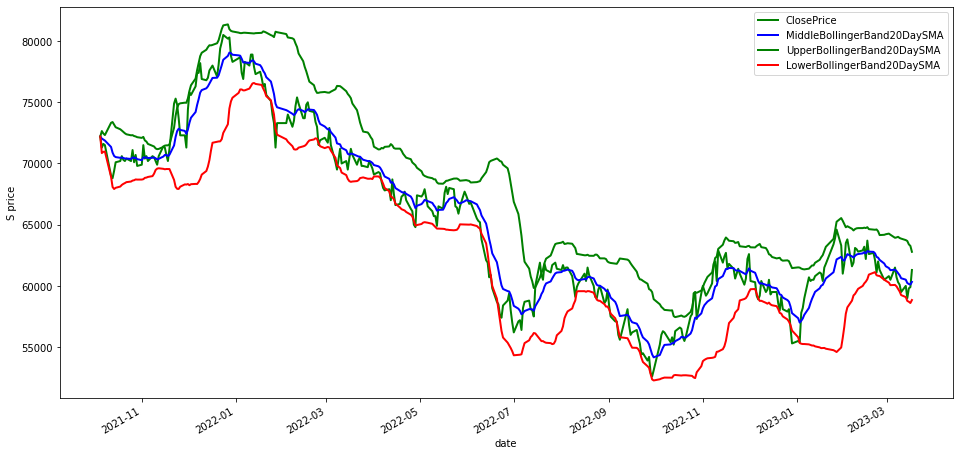

In [4]:
import statistics as stats
import math as math

time_period = 20
stdev_factor = 2

history = []
sma_values = []
upper_band = []
lower_band = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma)
    
    variance = 0
    
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
        
    stdev = math.sqrt(variance / len(history))
    
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(MiddleBollingerBand20DaySMA=pd.Series(ema_fast_values, index=s_data.index))
s_data = s_data.assign(UpperBollingerBand20DaySMA=pd.Series(upper_band, index=s_data.index))
s_data = s_data.assign(LowerBollingerBand20DaySMA=pd.Series(lower_band, index=s_data.index))

close_price = s_data['ClosePrice']
mband = s_data['MiddleBollingerBand20DaySMA']
uband = s_data['UpperBollingerBand20DaySMA']
lband = s_data['LowerBollingerBand20DaySMA']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111, ylabel='S price')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='g', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)

plt.show()